# 项目依赖库及功能说明

本项目使用了多个 Python 库来完成数据处理、模型构建与评估任务，以下是各库的功能简要说明。

## 数值计算与数据处理

- `numpy`：提供高效的多维数组操作和数值计算支持。
- `pandas`：用于数据加载、清洗以及结构化数据的操作，如读取 CSV 文件。

## 数据可视化

- `matplotlib.pyplot`：Python 中最常用的绘图库，适用于生成各类图表。
- `seaborn`：基于 matplotlib 的高级接口，提供更美观的图形样式和更简单的绘图方法。

## 系统工具

- `os`：操作系统交互模块，用于目录管理、文件路径操作等。
- `time`：记录训练耗时、预测耗时等性能指标。

## 深度学习框架（TensorFlow/Keras）

- `tensorflow`：深度学习框架核心模块，用于构建 CNN 模型、训练、评估及预测。
- `to_categorical`：将整数类别标签转换为 one-hot 编码格式。
- `Sequential`：顺序模型，层按顺序堆叠。
- `Conv2D`：卷积层，提取图像局部特征。
- `MaxPooling2D`：最大池化层，压缩特征图尺寸。
- `Flatten`：展平层，将二维特征图展平为一维向量。
- `Dense`：全连接层。
- `Dropout`：随机丢弃层，防止过拟合。
- `l2`：L2 正则化项，对权重进行惩罚以防止过拟合。

## 数据划分与模型评估

- `train_test_split`：将数据集划分为训练集和验证集。
- `KFold`：K 折交叉验证，提高模型泛化能力评估的可靠性。
- `accuracy_score`：准确率。
- `precision_score`：精确率。
- `recall_score`：召回率。
- `f1_score`：F1 分数。
- `classification_report`：打印每个类别的精确率、召回率、F1 分数汇总。
- `confusion_matrix`：显示分类结果的混淆矩阵。

## 自定义工具函数

- `utils`：自定义工具函数模块，封装常用的数据预处理、模型评估、绘图辅助函数等。辅助函数等。

整个流程涵盖了从数据预处理到模型训练、评估与可视化的完整机器学习工作流。的数据预处理、模型评估、绘图辅助函数等。

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import tensorflow as tf

from utils import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.utils import resample
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

设置中文字体，便于后面画图显示

In [106]:
# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号 '-' 显示为方块的问题

#  加载数据

读取 CSV 文件，加载 Fashion-MNIST 数据集的训练集和测试集，并将数据拆分为图像特征和标签

In [107]:
train = pd.read_csv("./dataset/fashion-mnist_train.csv")
test = pd.read_csv("./dataset/fashion-mnist_test.csv") 
(train_images, train_labels), (test_images, test_labels) = load_data(train,test)

对图像像素值进行归一化处理，并查看训练集的形状信息。

In [108]:
train_images = train_images / 255.0  # normalize pixel values
test_images = test_images / 255.0

# 处理数据，便于对cnn进行训练

用于 CNN 的数据重塑（reshape）

In [109]:
# 将图像从 (样本数, 784) 转换为 (样本数, 28, 28, 1)，即 HxWxC 格式
X_train = train_images.reshape(-1, 28, 28, 1)
X_test = test_images.reshape(-1, 28, 28, 1)

用于 CNN 的一键编码（One-Hot Encoding）

In [110]:
y_train_cat = to_categorical(train_labels, num_classes=10)
y_test_cat = to_categorical(test_labels, num_classes=10)

显示 train 这个数据集（DataFrame）的前 5 行数据。

In [111]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 展示图片

定义 Fashion-MNIST 的类别对应的中文标签

In [112]:
fashion_mnist_labels = {
    0: "T恤",
    1: "裤子",
    2: "套衫",
    3: "连衣裙",
    4: "外套",
    5: "凉鞋",
    6: "衬衫",
    7: "运动鞋",
    8: "包",
    9: "踝靴"
}

展示Fashion-MNIST 数据集的一些图片

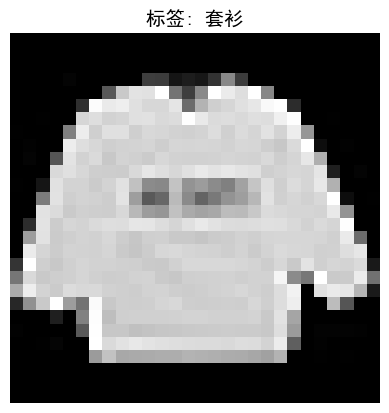

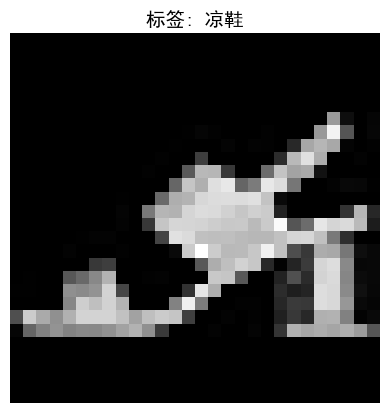

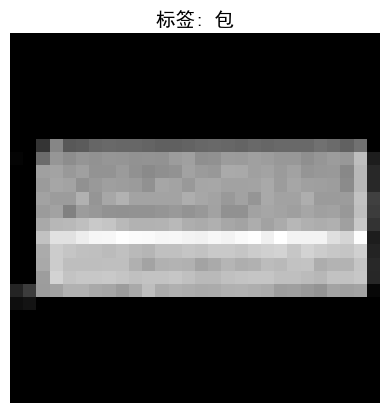

In [113]:
def show_image(index):
    label_num = train.iloc[index, 0]  # 获取数字标签
    label_ch = fashion_mnist_labels[label_num]  # 转换为中文标签
    pixels = train.iloc[index, 1:].values.reshape(28, 28)  # 展示图像像素
    
    plt.figure()
    plt.title(f"标签: {label_ch}", fontsize=14)
    plt.imshow(pixels, cmap='gray')
    plt.axis('off')
    plt.show()
show_image(0)
show_image(50)
show_image(1000)

创建并展示一个包含 100 张 Fashion-MNIST 数据集图像的大图

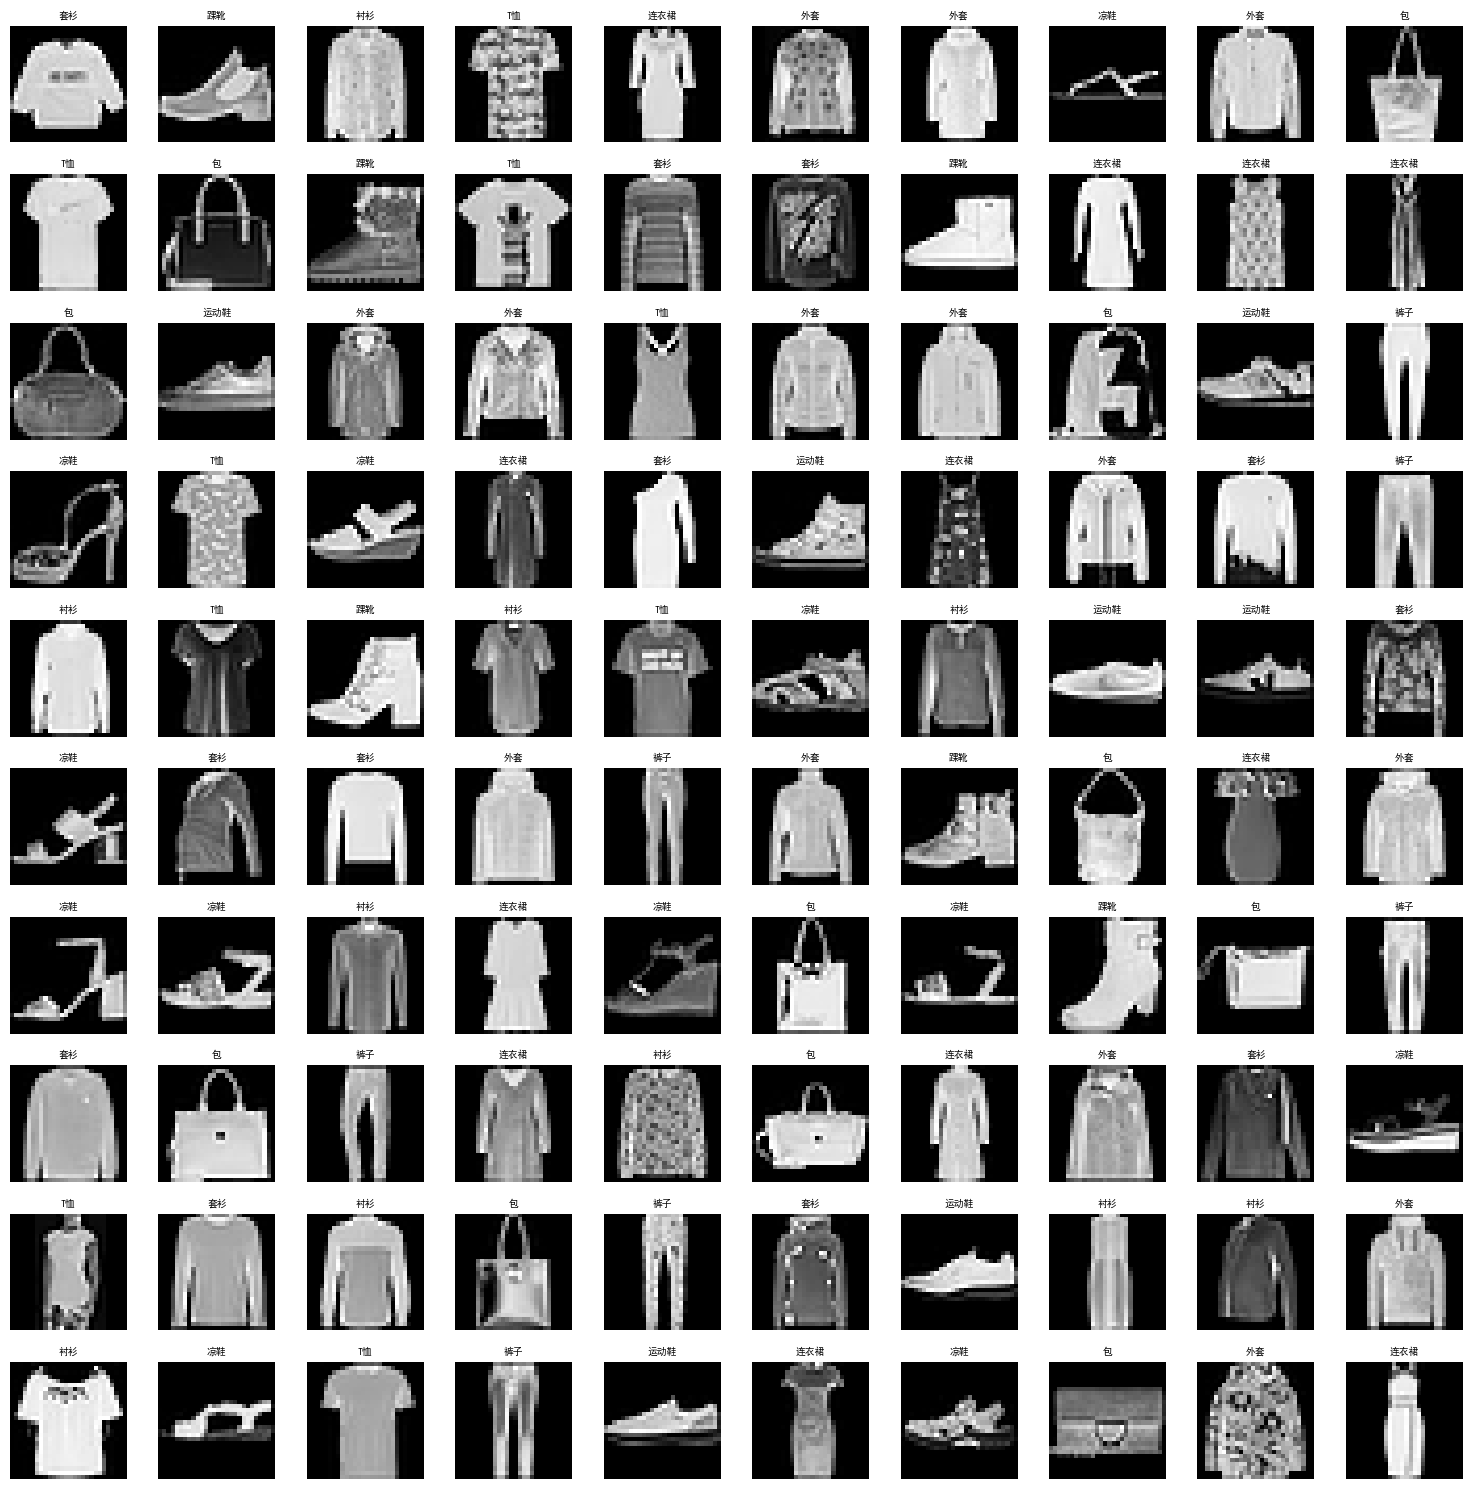

In [114]:
# 创建一个大图
plt.figure(figsize=(15, 15))  # 调整画布大小

for i in range(100):
    label_num = train.iloc[i, 0]  # 获取数字标签
    label_ch = fashion_mnist_labels[label_num]  # 转换为中文标签
    pixels = train.iloc[i, 1:].values.reshape(28, 28)  # 展开图像像素
    
    plt.subplot(10, 10, i + 1)
    plt.imshow(pixels, cmap='gray')
    plt.title(label_ch, fontsize=7)  # 设置标题为中文
    plt.axis('off')  # 不显示坐标轴

plt.tight_layout()  # 自动调整子图参数,使之填充整个图像区域
plt.show()

# 卷积神经网络（CNN）简介

卷积神经网络是一种深度学习模型，特别适合处理具有网格结构的数据，如图像。CNN通过使用卷积层自动且有效地提取图像中的特征，从而在图像识别、分类等任务中表现出色。

## CNN的基本组成部分

1. **卷积层（Convolutional Layer）**
   - 使用一组可学习的滤波器（filters），每个滤波器与输入数据进行卷积操作，以生成特征图。
   - 每个滤波器可以检测输入图像中的特定类型模式或特征。

2. **池化层（Pooling Layer）**
   - 通常用于减少特征图的空间维度（宽度和高度），同时保留最重要的信息。
   - 最常见的形式是最大池化（Max Pooling），它选择每个池化区域的最大值作为输出。

3. **全连接层（Fully Connected Layer）**
   - 在经过一系列卷积和池化层后，通常会将特征图展平并通过一个或多个全连接层来执行最终的分类。

4. **激活函数（Activation Function）**
   - 如ReLU（Rectified Linear Unit），用于引入非线性因素，使模型能够学习更复杂的模式。

5. **正则化（Regularization）**
   - 如Dropout，防止过拟合。

## 构建一个简单的CNN模型
下面我们将构建一个简单的CNN模型，用于处理类似Fashion-MNIST这样的图像分类任务。

确保使用 GPU 加速训练

In [115]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(f"{len(physical_devices)} 物理 GPU，{len(logical_gpus)} 逻辑 GPU")
else:
    print("未检测到可用的 GPU。")

1 物理 GPU，1 逻辑 GPU


创建 CNN 模型函数（包含 10 个卷积层和 L2 正则化）

In [116]:
# 设置 5 折交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 创建 CNN 模型函数（包含 10 个卷积层和 L2 正则化）
def create_cnn_model():
    weight_decay = 1e-4  # L2 正则化系数
    model = Sequential()

    # 添加 10 层卷积层，逐步增加滤波器数量
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1), kernel_regularizer=l2(weight_decay)))
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
    model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))

    # 添加全连接层
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(weight_decay)))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    # 编译模型
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

5 折交叉验证训练与评估循环

In [119]:
# 存储每折的评估结果和训练历史
fold_metrics = []
all_histories = []  # 存储每折的训练历史

# 开始 5 折交叉验证
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\n第 {fold+1} 折训练开始")

    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train_cat[train_idx], y_train_cat[val_idx]

    model = create_cnn_model()

    start_time = time.time()
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=100,  # 可以根据需要调整
        batch_size=64,
        verbose=1
    )
    training_time = time.time() - start_time

    # 保存历史记录用于绘图
    all_histories.append(history.history)

    # 预测并计算指标
    start_pred = time.time()
    y_val_pred = model.predict(X_val_fold)
    prediction_time = time.time() - start_pred
    y_val_pred_labels = np.argmax(y_val_pred, axis=1)
    y_val_true = np.argmax(y_val_fold, axis=1)

    acc = accuracy_score(y_val_true, y_val_pred_labels)
    prec = precision_score(y_val_true, y_val_pred_labels, average='weighted')
    rec = recall_score(y_val_true, y_val_pred_labels, average='weighted')
    f1 = f1_score(y_val_true, y_val_pred_labels, average='weighted')

    fold_metrics.append({
        '准确率': acc,
        '精确率': prec,
        '召回率': rec,
        'F1分数': f1,
        '训练耗时': training_time,
        '预测耗时': prediction_time
    })


第 1 折训练开始
Epoch 1/100
750/750 [==============================] - 13s 15ms/step - loss: 0.7398 - accuracy: 0.7565 - val_loss: 0.4421 - val_accuracy: 0.8601
Epoch 2/100
750/750 [==============================] - 11s 14ms/step - loss: 0.4610 - accuracy: 0.8654 - val_loss: 0.4162 - val_accuracy: 0.8680
Epoch 3/100
750/750 [==============================] - 11s 14ms/step - loss: 0.4089 - accuracy: 0.8853 - val_loss: 0.3746 - val_accuracy: 0.8950
Epoch 4/100
750/750 [==============================] - 11s 14ms/step - loss: 0.3860 - accuracy: 0.8942 - val_loss: 0.3454 - val_accuracy: 0.9064
Epoch 5/100
750/750 [==============================] - 11s 14ms/step - loss: 0.3685 - accuracy: 0.9001 - val_loss: 0.3371 - val_accuracy: 0.9114
Epoch 6/100
750/750 [==============================] - 11s 14ms/step - loss: 0.3530 - accuracy: 0.9059 - val_loss: 0.3361 - val_accuracy: 0.9137
Epoch 7/100
750/750 [==============================] - 11s 14ms/step - loss: 0.3475 - accuracy: 0.9099 - val_loss: 0.33

输出各折平均结果

In [120]:
df_metrics = pd.DataFrame(fold_metrics)
print("\n所有折的平均性能指标：")
print(df_metrics.mean())


所有折的平均性能指标：
准确率        0.933783
精确率        0.933892
召回率        0.933783
F1分数       0.933278
训练耗时    1066.105713
预测耗时       2.846312
dtype: float64


绘制绘制每折的训练和验证损失曲线

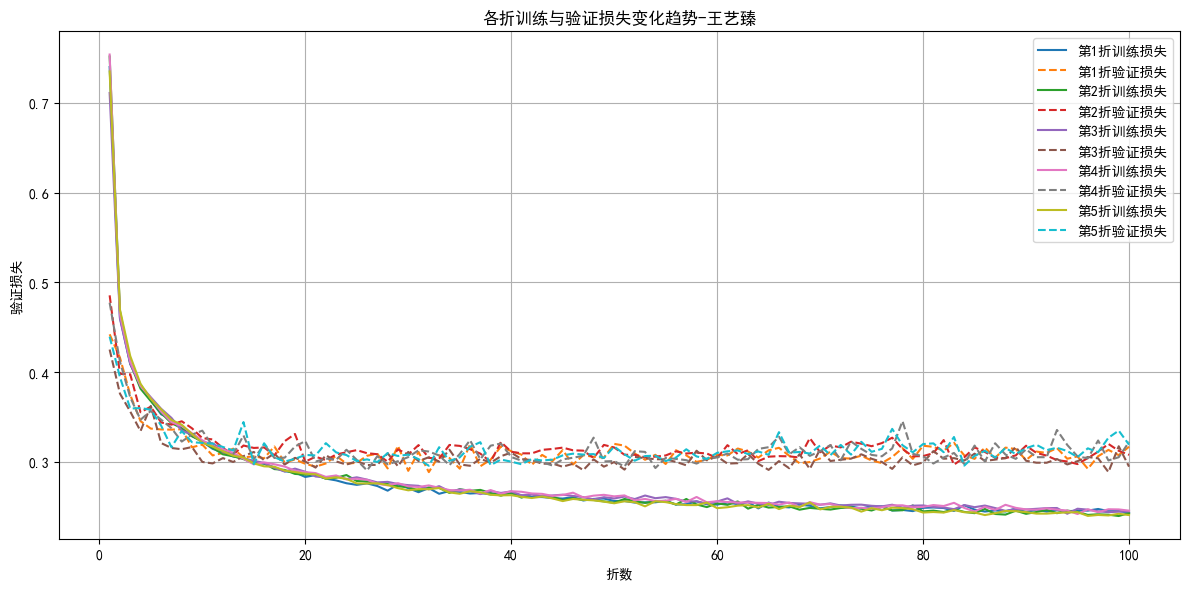

In [134]:
plt.figure(figsize=(12, 6))

for i, history in enumerate(all_histories):
    epochs = range(1, len(history['loss']) + 1)
    plt.plot(epochs, history['loss'], label=f'第{i+1}折训练损失')
    plt.plot(epochs, history['val_loss'], linestyle='--', label=f'第{i+1}折验证损失')

plt.title('各折训练与验证损失变化趋势-王艺臻')
plt.xlabel('折数')
plt.ylabel('验证损失')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 将每折的指标绘出

绘制每折交叉验证的评估指标得分柱状图

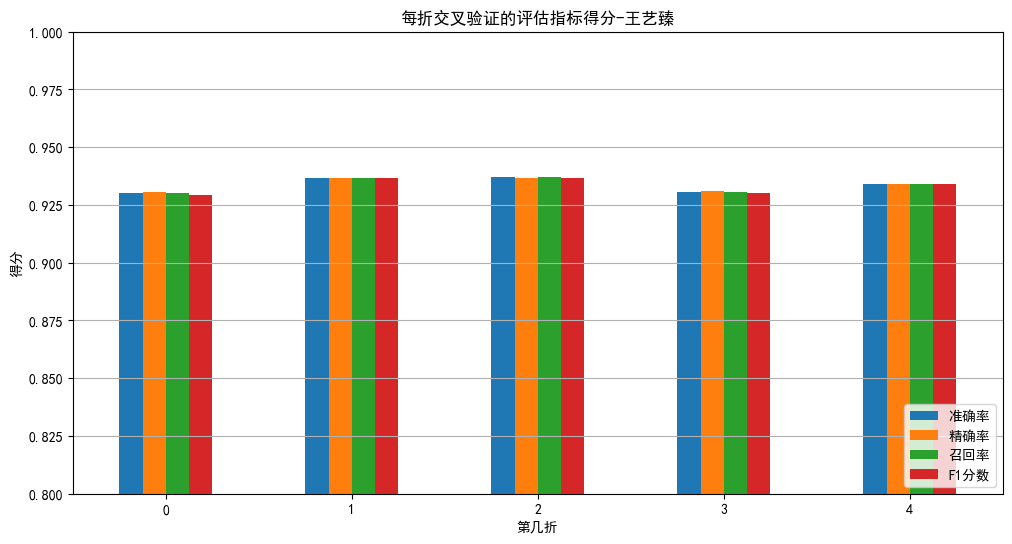

In [122]:
# 准备用于绘图的数据
df_metrics_plot = df_metrics[['准确率', '精确率', '召回率', 'F1分数']]

# 绘制柱状图
df_metrics_plot.plot(kind='bar', figsize=(12, 6))
plt.title("每折交叉验证的评估指标得分-王艺臻")
plt.xlabel("第几折")
plt.ylabel("得分")
plt.xticks(rotation=0)
plt.ylim(0.8, 1.0)  # 设置 Y 轴范围
plt.grid(axis='y')  # 只显示横向网格线
plt.legend(loc='lower right')  # 图例位置
plt.show()

绘制每折训练和预测时间柱状图

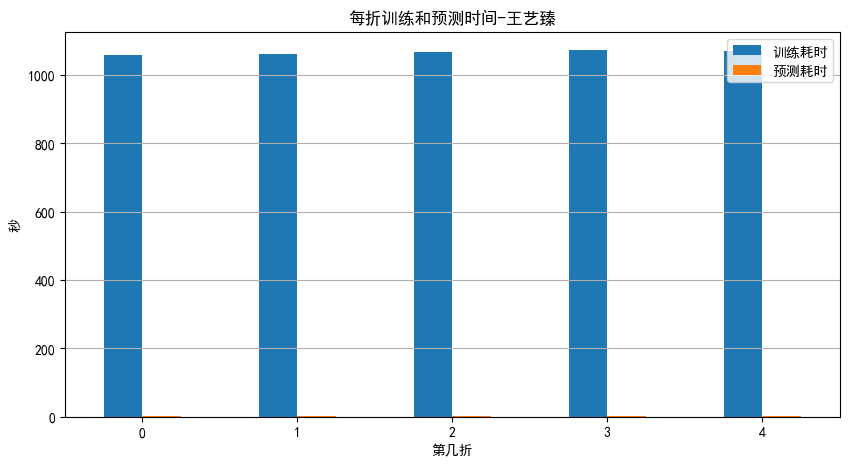

In [123]:
df_metrics[['训练耗时', '预测耗时']].plot(kind='bar', figsize=(10,5))
plt.title("每折训练和预测时间-王艺臻")
plt.xlabel("第几折")
plt.ylabel("秒")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='upper right')  # 图例位置
plt.show()

绘制各指标与时间的相关性

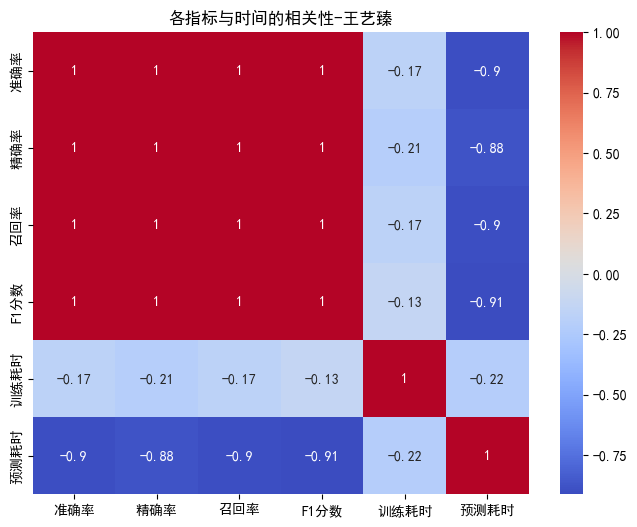

In [124]:
import numpy as np

plt.figure(figsize=(8,6))
sns.heatmap(df_metrics.corr(), annot=True, cmap='coolwarm')
plt.title("各指标与时间的相关性-王艺臻")
plt.show()

# 利用训练好的模型进行测试

模型测试

In [125]:
# 假设已经定义了模型 model 并且训练完成
# X_test 和 test_labels 是你的测试集特征和标签

print("开始预测测试集...")

# 假设我们进行5轮测试
num_rounds = 5

# 初始化用于存储各指标的列表
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for round in range(num_rounds):
    print(f"第 {round + 1} 轮测试...")
    
    # 使用 resample 进行无放回抽样 (或者设置 replace=True 进行有放回抽样)
    X_test_sub, y_test_sub = resample(X_test, test_labels, n_samples=5000, random_state=round)  # 设置 n_samples 为你希望的子集大小
    
    # 预测概率
    y_test_pred_probs = model.predict(X_test_sub)
    # 获取预测标签
    y_test_pred_labels = np.argmax(y_test_pred_probs, axis=1)
    
    # 计算并打印本轮的各项指标
    accuracy = accuracy_score(y_test_sub, y_test_pred_labels)
    precision = precision_score(y_test_sub, y_test_pred_labels, average='weighted')
    recall = recall_score(y_test_sub, y_test_pred_labels, average='weighted')
    f1 = f1_score(y_test_sub, y_test_pred_labels, average='weighted')
    
    print(f"第 {round + 1} 轮测试准确率: {accuracy:.4f}")
    print(f"第 {round + 1} 轮测试精确率: {precision:.4f}")
    print(f"第 {round + 1} 轮测试召回率: {recall:.4f}")
    print(f"第 {round + 1} 轮测试F1分数: {f1:.4f}")
    
    # 存储各项指标
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

开始预测测试集...
第 1 轮测试...
157/157 [==============================] - 1s 4ms/step
第 1 轮测试准确率: 0.9360
第 1 轮测试精确率: 0.9361
第 1 轮测试召回率: 0.9360
第 1 轮测试F1分数: 0.9357
第 2 轮测试...
157/157 [==============================] - 1s 4ms/step
第 2 轮测试准确率: 0.9390
第 2 轮测试精确率: 0.9391
第 2 轮测试召回率: 0.9390
第 2 轮测试F1分数: 0.9388
第 3 轮测试...
157/157 [==============================] - 1s 4ms/step
第 3 轮测试准确率: 0.9362
第 3 轮测试精确率: 0.9360
第 3 轮测试召回率: 0.9362
第 3 轮测试F1分数: 0.9357
第 4 轮测试...
157/157 [==============================] - 1s 4ms/step
第 4 轮测试准确率: 0.9380
第 4 轮测试精确率: 0.9379
第 4 轮测试召回率: 0.9380
第 4 轮测试F1分数: 0.9376
第 5 轮测试...
157/157 [==============================] - 1s 4ms/step
第 5 轮测试准确率: 0.9344
第 5 轮测试精确率: 0.9343
第 5 轮测试召回率: 0.9344
第 5 轮测试F1分数: 0.9340


准确率，精确率，召回率，f1分数也要绘出测试准确率随轮次变化趋势图

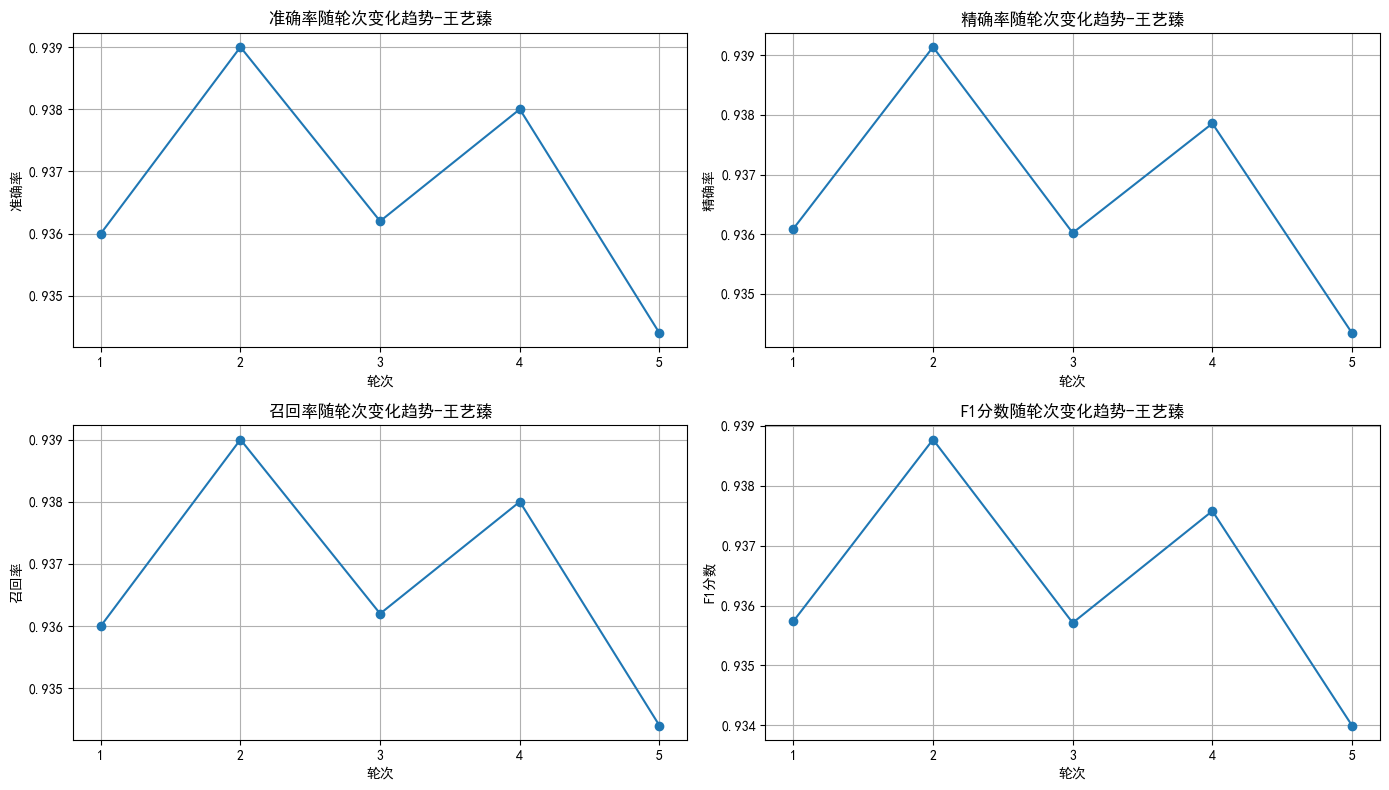

In [133]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, num_rounds + 1), accuracy_scores, marker='o', label='准确率')
plt.title('准确率随轮次变化趋势-王艺臻')
plt.xlabel('轮次')
plt.ylabel('准确率')
plt.xticks(range(1, num_rounds + 1))
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, num_rounds + 1), precision_scores, marker='o', label='精确率')
plt.title('精确率随轮次变化趋势-王艺臻')
plt.xlabel('轮次')
plt.ylabel('精确率')
plt.xticks(range(1, num_rounds + 1))
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(1, num_rounds + 1), recall_scores, marker='o', label='召回率')
plt.title('召回率随轮次变化趋势-王艺臻')
plt.xlabel('轮次')
plt.ylabel('召回率')
plt.xticks(range(1, num_rounds + 1))
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(1, num_rounds + 1), f1_scores, marker='o', label='F1分数')
plt.title('F1分数随轮次变化趋势-王艺臻')
plt.xlabel('轮次')
plt.ylabel('F1分数')
plt.xticks(range(1, num_rounds + 1))
plt.grid(True)

plt.tight_layout()
plt.show()

可以发现四个指标均在较小范围内波动，说明模型稳定

# 预测结果

一些预测结果的展示图

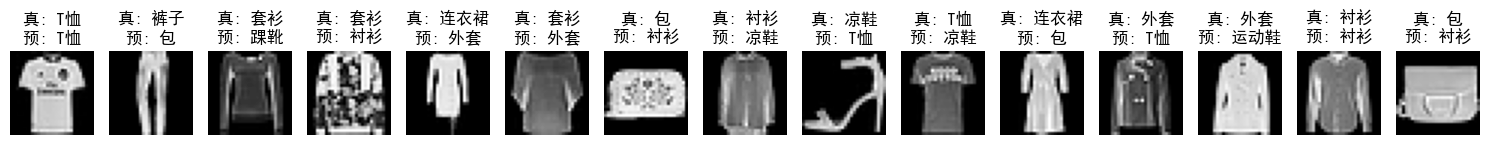

In [127]:
def show_predictions(images, true_labels, predicted_labels, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"真: {fashion_mnist_labels[true_labels[i]]}\n预: {fashion_mnist_labels[predicted_labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 显示前 15 个测试图像及预测结果
show_predictions(X_test, test_labels, y_test_pred_labels, num_samples=15)

## 混淆矩阵

计算混淆矩阵

In [128]:
cm = confusion_matrix(y_test_sub, y_test_pred_labels)

混淆矩阵可视化

Text(96.08159722222221, 0.5, '真实标签')

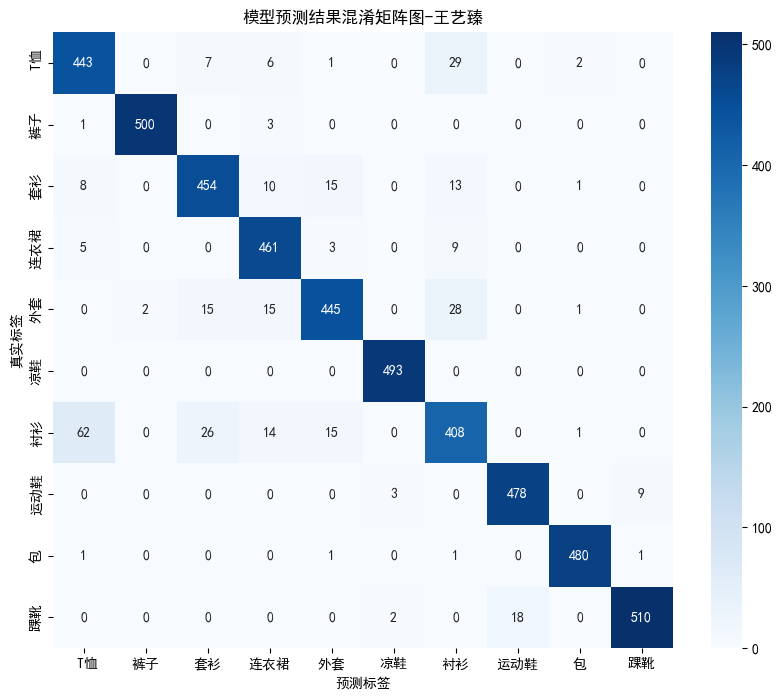

In [129]:
Named_labels = [' T恤', '裤子', '套衫', '连衣裙', '外套','凉鞋', '衬衫', '运动鞋', '包', '踝靴']
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=Named_labels, yticklabels=Named_labels)
plt.title('模型预测结果混淆矩阵图-王艺臻')
plt.xlabel('预测标签')
plt.ylabel('真实标签')

# 各类别预测准确率可视化

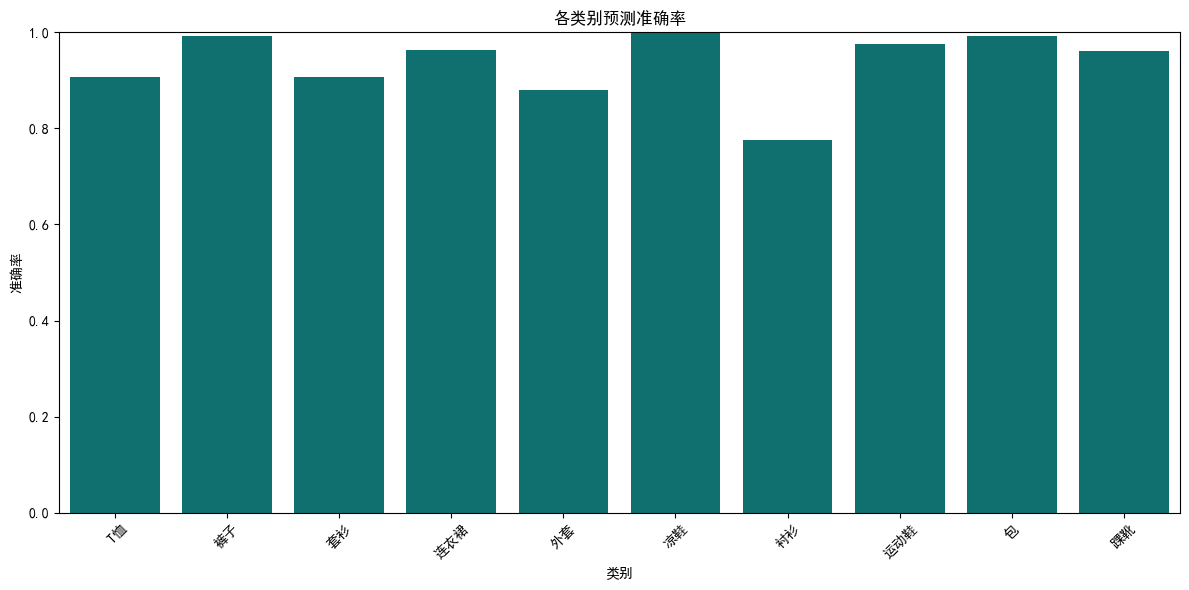

In [130]:
class_accuracies = []
for i in range(len(Named_labels)):
    correct_predictions = cm[i, i]
    total_samples = np.sum(cm[i, :])
    if total_samples > 0:
        class_accuracy = correct_predictions / total_samples
    else:
        class_accuracy = 0.0
    class_accuracies.append(class_accuracy)

# 可视化每个类别的准确率
plt.figure(figsize=(12, 6))
sns.barplot(x=Named_labels, y=class_accuracies,color='teal')
plt.title('各类别预测准确率')
plt.xlabel('类别')
plt.ylabel('准确率')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # 设置Y轴范围为0到1
plt.tight_layout()
plt.show()

# 输出预测测试集，便于与其他方法比较

In [131]:
model = create_cnn_model()
# 对测试集进行预测
y_test_pred = final_model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

313/313 [==============================] - 1s 4ms/step


In [132]:
evaluation_results = {
    '真实标签':test_labels,
    '预测标签':y_test_pred_labels,
    '是否正确':['True' if true == pred else 'False' for true, pred in zip(test_labels, y_test_pred_labels)]
}
test_df = pd.DataFrame(evaluation_results)
os.makedirs('./预测结果', exist_ok=True)
test_df.to_csv('./预测结果/cnn_results.csv', index=False)